In [84]:
# Most demanded skill for top 3 data roles 
import pandas as pd 
from datasets import load_dataset 
import matplotlib.pyplot as plt
import ast
import seaborn as sns
# load data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [85]:
# filter to US 

df_US = df[df['job_country'] == 'United States']

In [86]:
# explode to separate skills
df_skills = df_US.explode('job_skills')

df_skills[['job_title_short' , 'job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


In [87]:
# group all job title and job skills to get count by using size()

df_skills_count1 = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count1 = df_skills_count1.reset_index(name ='skill_count')

df_skills_count1.sort_values(by = 'skill_count', ascending=False, inplace = True) # reset index to skill count to change type from pandas to dataframe 

df_skills_count1

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [88]:
job_titles = df_skills_count1['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

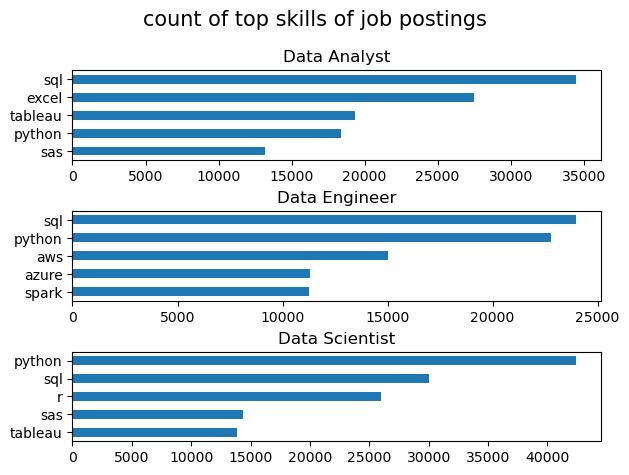

In [89]:
fig, ax = plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count1[df_skills_count1['job_title_short'] == job_title].head(5)
    df_plot.plot(kind = 'barh', x = 'job_skills', y = 'skill_count', ax = ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)


fig.suptitle("count of top skills of job postings", fontsize = 15)
fig.tight_layout(h_pad = 0.5) # to fix overlap
plt.show()

In [90]:
# to get % of skills as per no of job postings 
# % skill in job posting = total job postings / total skill count 

df_job_total = df_US['job_title_short'].value_counts().reset_index(name = 'job_total')
df_job_total

,job_title_short,job_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [91]:
df_skill_percent = pd.merge(df_skills_count1, df_job_total, how = 'left', on = 'job_title_short')

df_skill_percent['skill_percent'] = 100 * df_skill_percent['skill_count'] / df_skill_percent['job_total']

df_skill_percent

,job_skills,job_title_short,skill_count,job_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


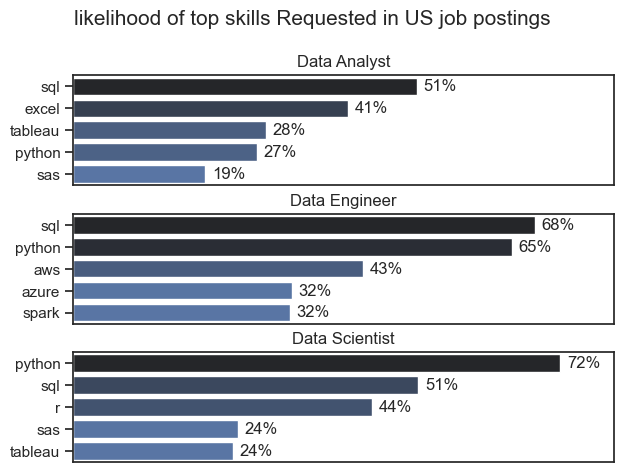

In [102]:
fig, ax = plt.subplots(len(job_titles),1)

sns.set_theme(style = 'ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skill_percent[df_skill_percent['job_title_short'] == job_title].head(5)
   
    sns.barplot(data = df_plot, x = 'skill_percent', y = 'job_skills', ax = ax[i], hue = 'skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].legend().remove()
    ax[i].set_xlim(0,80)

    for n , v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va = 'center' )
    ax[i].set_xticks([])

fig.suptitle("likelihood of top skills Requested in US job postings", fontsize = 15)
fig.tight_layout(h_pad = 0.5) # to fix overlap
plt.show()